In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv(r'C:\Users\daksh\Downloads\food_coded.csv')

# Select the relevant parameters
parameters = ['cook', 'eating_out', 'employment', 'ethnic_food', 'exercise', 'fruit_day', 'income', 'on_off_campus', 'pay_meal_out', 'sports', 'veggies_day']
df = df[parameters]

# Now df contains only the columns specified in 'parameters'
print(df)


     cook  eating_out  employment  ethnic_food  exercise  fruit_day  income  \
0     2.0           3         3.0            1       1.0          5     5.0   
1     3.0           2         2.0            4       1.0          4     4.0   
2     1.0           2         3.0            5       2.0          5     6.0   
3     2.0           2         3.0            5       3.0          4     6.0   
4     1.0           2         2.0            4       1.0          4     6.0   
..    ...         ...         ...          ...       ...        ...     ...   
120   3.0           2         1.0            4       2.0          5     4.0   
121   3.0           4         3.0            3       2.0          4     2.0   
122   3.0           3         3.0            5       2.0          4     2.0   
123   3.0           5         2.0            2       1.0          5     4.0   
124   NaN           1         2.0            3       2.0          3     5.0   

     on_off_campus  pay_meal_out  sports  veggies_d

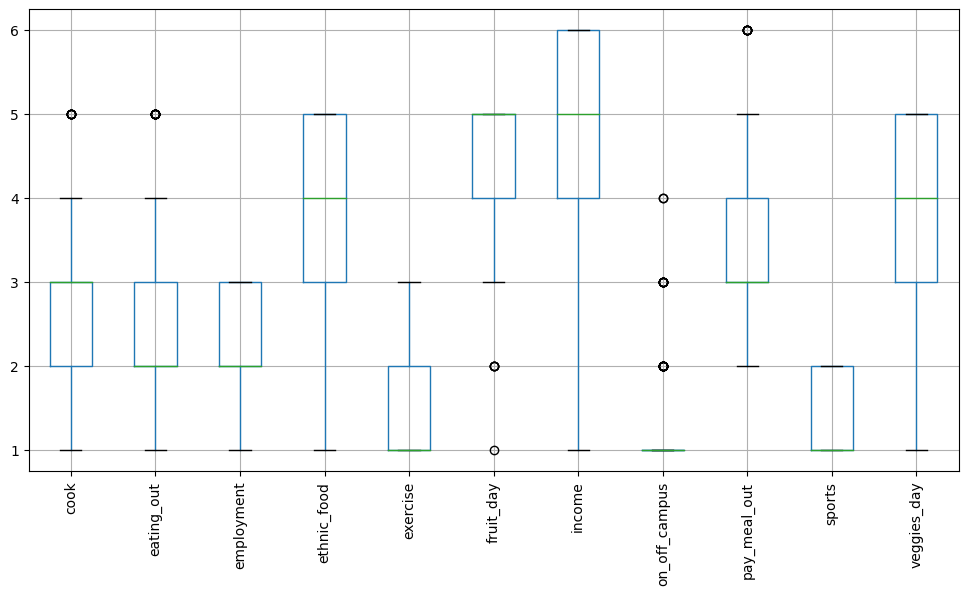

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  
df.boxplot()  # Create a boxplot of all columns in the DataFrame
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [3]:
from sklearn.impute import SimpleImputer

# Use mean as fill value
imputer = SimpleImputer(strategy='mean')

# Fit on the DataFrame and then transform it
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

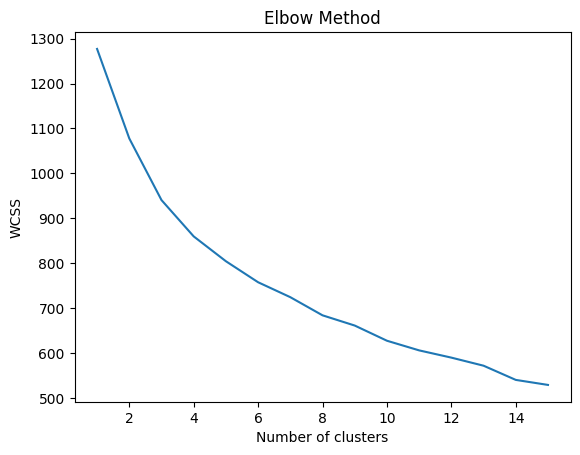

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [5]:
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df)

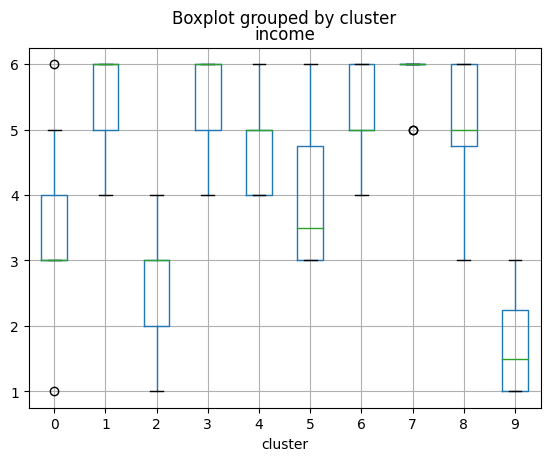

In [6]:
df['cluster'] = pred_y  # Add cluster information to the DataFrame
df.boxplot(by='cluster', column=['income'])
plt.show()

In [1]:
import requests

url = "https://api.foursquare.com/v3/places/search"

params = {
  	"query": "Grocery Stores",
  	"ll": "12.97,77.59",
}

headers = {
    "Accept": "application/json",
    "Authorization": "fsq3LGBz/QH5PDxN3K8fPunCcB/Psf94TfEX1Me2ciNra4w="
}

response = requests.request("GET", url, params=params, headers=headers)

print(response.text)


{"results":[{"fsq_id":"4f93f925e4b0aed81ffde2ab","categories":[{"id":17033,"name":"Department Store","short_name":"Department Store","plural_name":"Department Stores","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/shops/departmentstore_","suffix":".png"}}],"chains":[],"closed_bucket":"LikelyOpen","distance":6121,"geocodes":{"main":{"latitude":12.932407,"longitude":77.631383},"roof":{"latitude":12.932407,"longitude":77.631383}},"link":"/v3/places/4f93f925e4b0aed81ffde2ab","location":{"address":"755 4th Block, 80 Feet Road, Koramangala","country":"IN","cross_street":"Bet. Costa Coffee & The French Loaf","formatted_address":"755 4th Block, 80 Feet Road, Koramangala (Bet. Costa Coffee & The French Loaf), Bangalore 560034, Karnātaka","locality":"Bangalore","postcode":"560034","region":"Karnātaka"},"name":"Godrej Natures Basket","related_places":{},"timezone":"Asia/Kolkata"},{"fsq_id":"4e36b781b0fb59390eabb4ff","categories":[{"id":17069,"name":"Grocery Store","short_name":"Grocery 

In [2]:
import requests
import pandas as pd

import requests

url = "https://api.foursquare.com/v3/places/search"

params = {
    "query": "Grocery Stores",
  	"ll": "12.97,77.59",
}

headers = {
    "Accept": "application/json",
    "Authorization": "fsq3LGBz/QH5PDxN3K8fPunCcB/Psf94TfEX1Me2ciNra4w="
}

response = requests.request("GET", url, params=params, headers=headers)

print(response.text)

# Parse the JSON response
data = response.json()

# Check for errors
if response.status_code == 200:
  # Extract relevant information from the response
  venues = data["results"]  # Assuming "results" key holds venue information
  venue_list = []
  for venue in venues:
      venue_dict = {}
      venue_dict["name"] = venue["name"]
      venue_dict["location"] = venue["geocodes"]["main"]
      venue_dict["location"] = venue["location"]["formatted_address"]
      venue_dict["distance"] = venue["distance"]  # Assuming "distance" key holds distance information
      venue_list.append(venue_dict)

  # Create a pandas dataframe
  df = pd.DataFrame(venue_list)
  print(df)
else:
  print(f"Error: {response.status_code}")


{"results":[{"fsq_id":"4f93f925e4b0aed81ffde2ab","categories":[{"id":17033,"name":"Department Store","short_name":"Department Store","plural_name":"Department Stores","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/shops/departmentstore_","suffix":".png"}}],"chains":[],"closed_bucket":"LikelyOpen","distance":6121,"geocodes":{"main":{"latitude":12.932407,"longitude":77.631383},"roof":{"latitude":12.932407,"longitude":77.631383}},"link":"/v3/places/4f93f925e4b0aed81ffde2ab","location":{"address":"755 4th Block, 80 Feet Road, Koramangala","country":"IN","cross_street":"Bet. Costa Coffee & The French Loaf","formatted_address":"755 4th Block, 80 Feet Road, Koramangala (Bet. Costa Coffee & The French Loaf), Bangalore 560034, Karnātaka","locality":"Bangalore","postcode":"560034","region":"Karnātaka"},"name":"Godrej Natures Basket","related_places":{},"timezone":"Asia/Kolkata"},{"fsq_id":"4e36b781b0fb59390eabb4ff","categories":[{"id":17069,"name":"Grocery Store","short_name":"Grocery 

In [3]:
import pandas as pd
import json

# Parse the JSON response into a Python dictionary
data = json.loads(response.text)

# Extract the list of venues from the response
venues = data["results"]  
venue_list = []
for venue in venues:
    venue_dict = {}
    venue_dict["name"] = venue["name"]
    venue_dict["location"] = venue["geocodes"]["main"]
    venue_dict["distance"] = venue["distance"]  
    venue_list.append(venue_dict)

# Prepare lists to hold the data
latitudes = []
longitudes = []
categories = []

# Loop through the list of venues and extract the data
for venue in venues:
    latitudes.append(venue['geocodes']['main']['latitude'])
    longitudes.append(venue['geocodes']['main']['longitude'])
    # Get the names of all categories for this venue
    venue_categories = [category['name'] for category in venue['categories']]
    # Filter the categories
    filtered_categories = [category for category in venue_categories if category in ['Restaurant']]
    filtered_categories = [category for category in venue_categories if category in ['Grocery Store']]
    categories.append(filtered_categories)

# Create a DataFrame from the lists
df = pd.DataFrame({
    'lat': latitudes,
    'lng': longitudes,
    'categories': categories
})

# Print the DataFrame
print(df)


         lat        lng       categories
0  12.932407  77.631383               []
1  12.971887  77.640961  [Grocery Store]
2  12.966520  77.597639  [Grocery Store]
3  12.966606  77.598058  [Grocery Store]
4  12.970836  77.604946  [Grocery Store]
5  12.971045  77.609968  [Grocery Store]
6  12.957436  77.562122  [Grocery Store]
7  12.939512  77.585518  [Grocery Store]
8  13.001758  77.594928  [Grocery Store]
9  12.997070  77.614159  [Grocery Store]


In [4]:
# Create new columns for restaurants and grocery stores
df['Restaurants'] = df['categories'].apply(lambda x: x.count('Indian Restaurant'))
df['Grocery Stores'] = df['categories'].apply(lambda x: x.count('Grocery Store'))

# Drop the 'categories' column as it's no longer needed
df = df.drop('categories', axis=1)

# Print the DataFrame
print(df)


         lat        lng  Restaurants  Grocery Stores
0  12.932407  77.631383            0               0
1  12.971887  77.640961            0               1
2  12.966520  77.597639            0               1
3  12.966606  77.598058            0               1
4  12.970836  77.604946            0               1
5  12.971045  77.609968            0               1
6  12.957436  77.562122            0               1
7  12.939512  77.585518            0               1
8  13.001758  77.594928            0               1
9  12.997070  77.614159            0               1


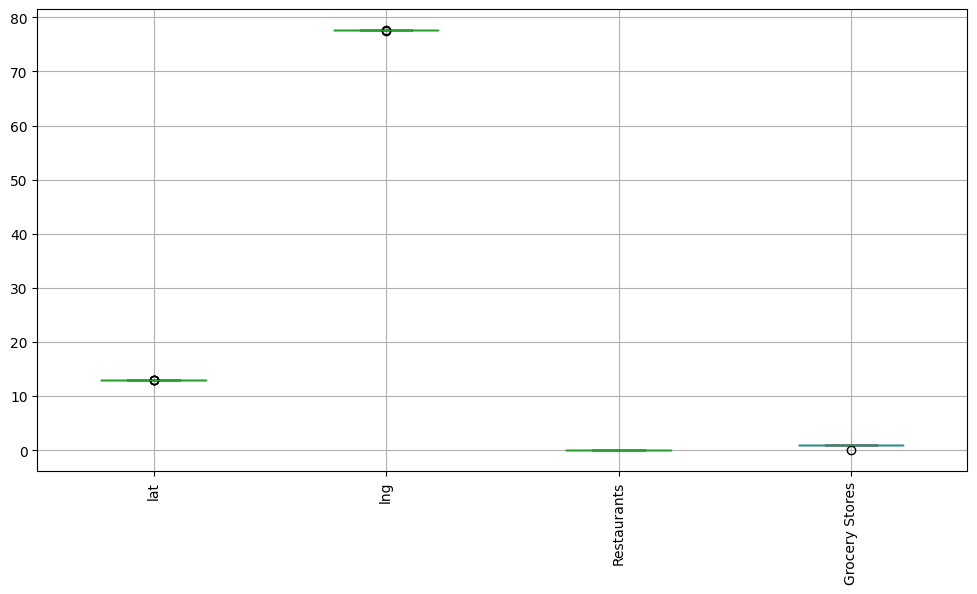

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  
df.boxplot()  # Create a boxplot of all columns in the DataFrame
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [6]:
from sklearn.impute import SimpleImputer

# Use mean as fill value
imputer = SimpleImputer(strategy='mean')

# Fit on the DataFrame and then transform it
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

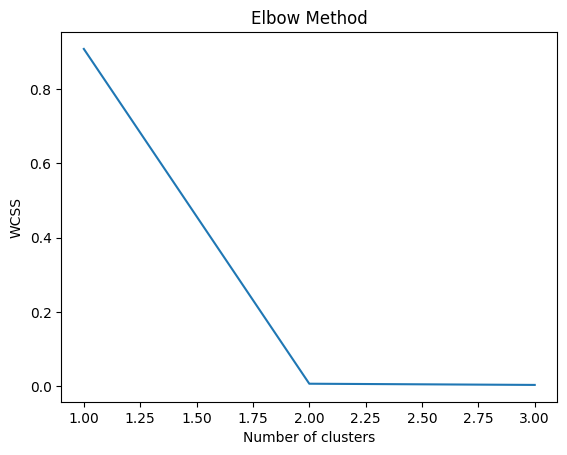

In [7]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,4):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,4), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df)

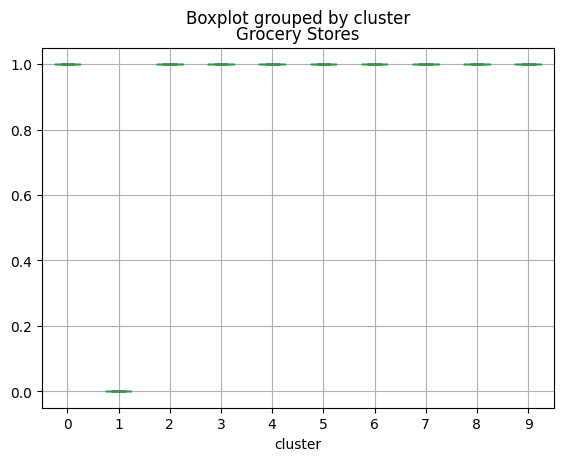

In [9]:
df['cluster'] = pred_y  # Add cluster information to the DataFrame
df.boxplot(by='cluster', column=['Grocery Stores'])
plt.show()

In [10]:
import folium
import pandas as pd
from sklearn.cluster import KMeans
import colorsys

# Assuming your DataFrame 'df' has 'latitude' and 'longitude' columns

# K-Means Clustering (replace parameters if needed)
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df[['lat', 'lng']])  # Use only latitude & longitude for clustering
df['cluster'] = pred_y

# Define a color mapping function
def get_color(cluster_number, num_clusters):
    """Maps cluster number to a color within the color spectrum."""
    # Normalize cluster number to a value between 0 and 1
    cluster_norm = cluster_number / (num_clusters - 1)

    # Use HSV color space for visual distinction
    h = cluster_norm  # Hue varies based on cluster number
    s = 0.8  # Adjust saturation for color intensity (0-1)
    v = 0.7  # Adjust value for brightness (0-1)

    # Convert HSV to RGB for use with Folium markers
    rgb_color = colorsys.hsv_to_rgb(h, s, v)

    # Convert RGB to a supported color name (adjust based on Folium version 16.0 options)
    color_map = {
        (0, 0, 1): 'blue',
        (0, 1, 0): 'green',
        (1, 0, 0): 'red',
        (1, 1, 0): 'yellow',
        (0, 1, 1): 'cyan',
        (1, 0, 1): 'magenta',
        (0.5, 0.5, 0.5): 'gray',
        # Add more color mappings as needed (check Folium v16.0 documentation for supported colors)
    }
    color_name = color_map.get(rgb_color, 'gray')  # Fallback to 'gray' if not found

    return color_name

# Assuming you have a chosen central location (latitude, longitude)
central_location = [12.97,77.59]

world_map = folium.Map(
    location=central_location,
    zoom_start=3,
    tiles='OpenStreetMap',  # Specify OpenStreetMap tiles
    attr='&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors'  # Add attribution
)


# Add markers with popups and color-coded based on cluster
for index, row in df.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    cluster_number = row['cluster']
    popup = f"Venue Name: {row['name'] if 'name' in row else 'Unknown'} <br> Cluster: {cluster_number}"  # Add name if available

    color = get_color(cluster_number, len(set(df['cluster'])))  # Use manual color mapping

    folium.Marker(
        location=[latitude, longitude],
        popup=popup,
        icon=folium.Icon(color=color)
    ).add_to(world_map)

# Display the map
world_map
